![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)

# **DeepFace - Age, Gender, Expression, Headpose and Recognition**

---


In this lesson, we use the **DeepFace API for Age, Gender, Expression Facial and Recognition. We even use the headpose library to obtain head direction/tilt**. DeepFace is an easy to use python module that provides access to several Facial Detection and Recognition models. It's very simple to use to let's dive in.

1. Install the necessary modules and download our files
2. Demonstrate facial landmarks
3. Obtain Age, Gender, Emotional Expression and Ethnicity using DeepFace
4. Perform Facial Similarity
5. Perform Facial Recognition


**NOTE** Change to High-RAM setting.


## **1. Install the necessary modules and download our files**

In [1]:
!pip install deepface
!gdown --id 1RDw1BqsuZv4auJNv3iJ4ToIOnBq9WsVZ
!unzip -q face_recognition.zip
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/me.jpg
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/shape_predictor_68_face_landmarks.dat
!gdown --id 1Id32-d-nS9BooBLLkw1PQhvLWWAukCsq
!gdown --id 1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI
!gdown --id 1d_tQRWjvQ5i4lZyUfFEfRj7LzXWXseBY
!gdown --id 1kWp2CVg_xTIFqdZAwfN_86A3grim9NyI
!mv facial_expression_model_weights.zip /root/.deepface/weights/facial_expression_model_weights.zip
!mv age_model_weights.h5 /root/.deepface/weights/age_model_weights.h5
!mv gender_model_weights.h5 /root/.deepface/weights/gender_model_weights.h5
!mv race_model_single_batch.zip /root/.deepface/weights/race_model_single_batch.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116932 sha256=032b273f81507becf09e5c63371fbfe449ae591db37f693d7a517859de9faf14
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google

#### **Define our imshow function**

In [2]:
import tarfile
import cv2
import numpy as np
from matplotlib import pyplot as plt
from deepface import DeepFace
import pprint
from imutils import face_utils
import pandas as pd


def imshow(title = "Image", image = None, size = 6):
  h, w = image.shape[:2]
  aspect_ratio = w/h
  plt.figure(figsize=(size * aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.title(title)
  plt.show()

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


## **2. Demonstrate facial landmarks**

## **3. Obtain Age, Gender, Emotional Expression and Ethnicity using DeepFace**



In [3]:
obj = DeepFace.analyze(img_path="./training_faces/Nidia_1.jpg", actions=['age', 'gender', 'race', 'emotion'])
obj = obj[0]
print(obj['age'], 'years old', obj['dominant_race'], obj['dominant_emotion'], obj['gender'])

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 62.6MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:09<00:00, 58.6MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:08<00:00, 63.2MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:08<00:00, 65.0MB/s]
Action: emotion: 100%|██████████| 4/4 [00:09<00:00,  2.35s/it]

32 years old asian sad {'Woman': 99.99321699142456, 'Man': 0.006777069938834757}


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  9.09it/s]


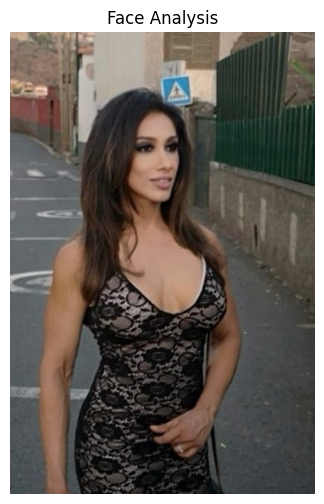

[   {   'age': 32,
        'dominant_emotion': 'sad',
        'dominant_gender': 'Woman',
        'dominant_race': 'asian',
        'emotion': {   'angry': 0.003826629200888367,
                       'disgust': 2.21705666942312e-06,
                       'fear': 1.026518765272947,
                       'happy': 1.230117825283745,
                       'neutral': 13.406168032427791,
                       'sad': 84.33334640662031,
                       'surprise': 2.674241591665299e-05},
        'gender': {'Man': 0.006777069938834757, 'Woman': 99.99321699142456},
        'race': {   'asian': 32.73313538629623,
                    'black': 4.501089721983059,
                    'indian': 26.20910562331114,
                    'latino hispanic': 22.987277685837608,
                    'middle eastern': 6.678691904466862,
                    'white': 6.890699678105097},
        'region': {'h': 88, 'w': 88, 'x': 131, 'y': 103}}]


In [4]:
img_path = "./training_faces/Nidia_1.jpg"
image = cv2.imread(img_path)

obj = DeepFace.analyze(img_path=img_path, actions=['age', 'gender', 'race', 'emotion'])
imshow("Face Analysis", image)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

#### **Create a simple function to display our results on the image**

In [5]:
def drawFace(img_path, obj, text='Face Analysis'):
  image = cv2.imread(img_path)
  obj = obj[0]
  x = obj['region']['x'] 
  y = obj['region']['y'] 
  h = obj['region']['h'] 
  w = obj['region']['w'] 
  age = obj['age']
  gender = obj['gender']
  gender = 'F' if gender['Woman'] > gender['Man'] else 'M'
  dominant_emotion = obj['dominant_emotion']
  dominant_race = obj['dominant_race']
  dominant_emotion = obj['dominant_emotion']
  description = f'{age}{gender} - {dominant_emotion}'
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
  cv2.putText(image, description, (x,y-10) , cv2.FONT_HERSHEY_PLAIN,2, (0,255,0), 3)
  cv2.putText(image, dominant_race, (x,y+h+30) , cv2.FONT_HERSHEY_PLAIN,2, (0,255,0), 3)
  imshow(text, image)

#### **Test on another image**

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  9.91it/s]


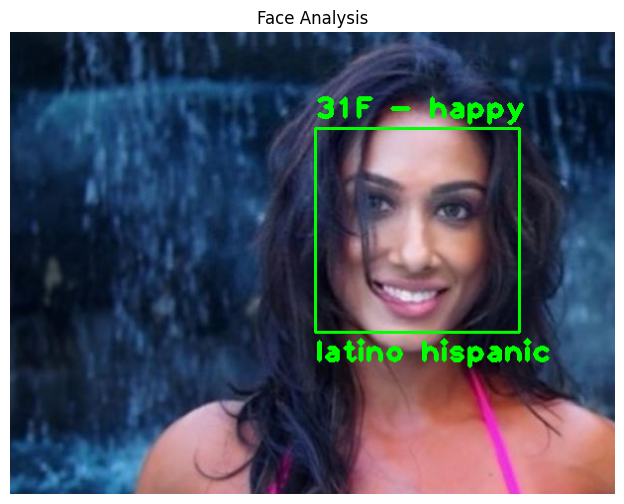

[   {   'age': 31,
        'dominant_emotion': 'happy',
        'dominant_gender': 'Woman',
        'dominant_race': 'latino hispanic',
        'emotion': {   'angry': 2.4348546290298145e-06,
                       'disgust': 1.2266672696863417e-12,
                       'fear': 1.9666528822126494e-09,
                       'happy': 80.68771362304688,
                       'neutral': 19.312094151973724,
                       'sad': 2.73720900167973e-05,
                       'surprise': 0.00015982078593879123},
        'gender': {'Man': 0.006294703780440614, 'Woman': 99.99370574951172},
        'race': {   'asian': 19.253620505332947,
                    'black': 8.695150911808014,
                    'indian': 16.4439395070076,
                    'latino hispanic': 36.59968376159668,
                    'middle eastern': 8.111139386892319,
                    'white': 10.89646965265274},
        'region': {'h': 206, 'w': 206, 'x': 308, 'y': 97}}]


In [6]:
img_path = "training_faces/Nidia_4.jpg"
image = cv2.imread(img_path)
obj = DeepFace.analyze(img_path=img_path, actions=['age', 'gender', 'race', 'emotion'])
drawFace(img_path, obj)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

#### **Change backends of face detection**

Action: emotion: 100%|██████████| 4/4 [00:00<00:00, 10.25it/s]


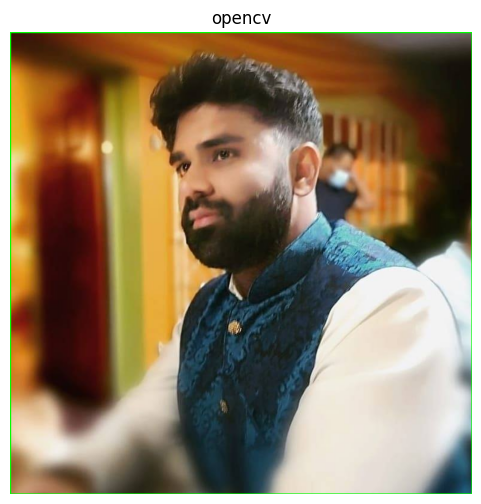

[   {   'age': 28,
        'dominant_emotion': 'fear',
        'dominant_gender': 'Man',
        'dominant_race': 'white',
        'emotion': {   'angry': 0.4641219973564148,
                       'disgust': 1.3003128174204903e-05,
                       'fear': 66.43500328063965,
                       'happy': 0.0002339626917091664,
                       'neutral': 0.8176992647349834,
                       'sad': 32.27890431880951,
                       'surprise': 0.004023349902126938},
        'gender': {'Man': 91.54570698738098, 'Woman': 8.454284816980362},
        'race': {   'asian': 20.77540730091377,
                    'black': 1.9027295725184423,
                    'indian': 1.0865347176214883,
                    'latino hispanic': 11.125218041254165,
                    'middle eastern': 9.673639218428088,
                    'white': 55.43647142866084},
        'region': {'h': 773, 'w': 773, 'x': 0, 'y': 0}}]
deploy.prototxt will be downloaded...


Downloading...
From: https://github.com/opencv/opencv/raw/3.4.0/samples/dnn/face_detector/deploy.prototxt
To: /root/.deepface/weights/deploy.prototxt
28.1kB [00:00, 24.2MB/s]                   


res10_300x300_ssd_iter_140000.caffemodel will be downloaded...


Downloading...
From: https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
To: /root/.deepface/weights/res10_300x300_ssd_iter_140000.caffemodel
100%|██████████| 10.7M/10.7M [00:00<00:00, 309MB/s]
Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  9.93it/s]


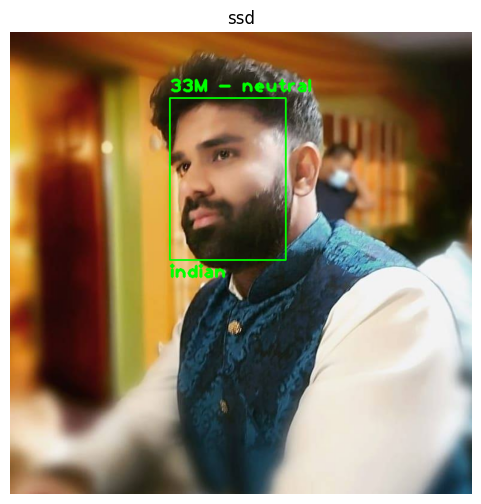

[   {   'age': 33,
        'dominant_emotion': 'neutral',
        'dominant_gender': 'Man',
        'dominant_race': 'indian',
        'emotion': {   'angry': 7.995468109575993,
                       'disgust': 0.024408187891472154,
                       'fear': 14.000647604504085,
                       'happy': 15.834164073119407,
                       'neutral': 30.08261502281517,
                       'sad': 26.338495393901788,
                       'surprise': 5.724206162941823},
        'gender': {'Man': 99.88698363304138, 'Woman': 0.11300891637802124},
        'race': {   'asian': 4.061274603009224,
                    'black': 3.938143700361252,
                    'indian': 30.789989233016968,
                    'latino hispanic': 28.573372960090637,
                    'middle eastern': 20.403453707695007,
                    'white': 12.23376840353012},
        'region': {'h': 271, 'w': 194, 'x': 267, 'y': 110}}]


Downloading...
From: http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
To: /root/.deepface/weights/shape_predictor_5_face_landmarks.dat.bz2


shape_predictor_5_face_landmarks.dat.bz2 is going to be downloaded


100%|██████████| 5.71M/5.71M [00:01<00:00, 3.10MB/s]
Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.40it/s]


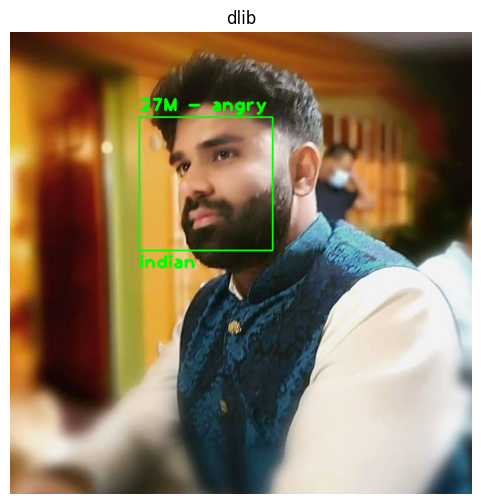

[   {   'age': 27,
        'dominant_emotion': 'angry',
        'dominant_gender': 'Man',
        'dominant_race': 'indian',
        'emotion': {   'angry': 79.44495677947998,
                       'disgust': 0.00019836145384033443,
                       'fear': 14.61636871099472,
                       'happy': 0.5372636951506138,
                       'neutral': 0.9376955218613148,
                       'sad': 4.392650723457336,
                       'surprise': 0.070862757274881},
        'gender': {'Man': 99.99580383300781, 'Woman': 0.0042009298340417445},
        'race': {   'asian': 0.5897728726267815,
                    'black': 3.6578375846147537,
                    'indian': 67.69852042198181,
                    'latino hispanic': 19.03124451637268,
                    'middle eastern': 5.386895313858986,
                    'white': 3.635740280151367},
        'region': {'h': 223, 'w': 223, 'x': 216, 'y': 142}}]
1/1 [==============================] - 0s 211ms/step


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  9.11it/s]


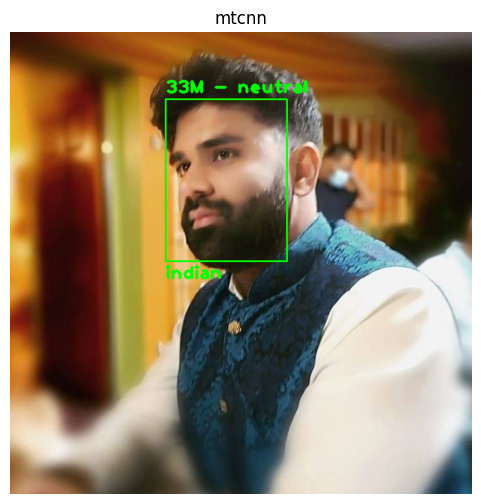

[   {   'age': 33,
        'dominant_emotion': 'neutral',
        'dominant_gender': 'Man',
        'dominant_race': 'indian',
        'emotion': {   'angry': 6.538928300142288,
                       'disgust': 0.002777904592221603,
                       'fear': 3.9120007306337357,
                       'happy': 17.52459704875946,
                       'neutral': 61.36308312416077,
                       'sad': 10.043008625507355,
                       'surprise': 0.6156011484563351},
        'gender': {'Man': 99.92376565933228, 'Woman': 0.07623734418302774},
        'race': {   'asian': 3.9026115089654922,
                    'black': 4.11478579044342,
                    'indian': 30.540940165519714,
                    'latino hispanic': 27.1102637052536,
                    'middle eastern': 21.73965275287628,
                    'white': 12.591743469238281},
        'region': {'h': 271, 'w': 203, 'x': 260, 'y': 112}}]
retinaface.h5 will be downloaded from the url https://gith

Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:02<00:00, 43.0MB/s]
Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  9.79it/s]


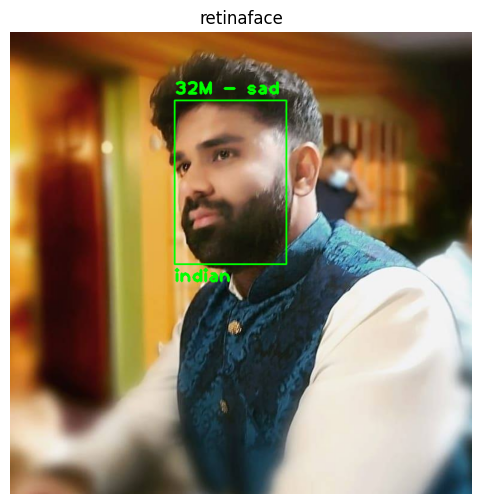

[   {   'age': 32,
        'dominant_emotion': 'sad',
        'dominant_gender': 'Man',
        'dominant_race': 'indian',
        'emotion': {   'angry': 0.6228137666919092,
                       'disgust': 0.008804714686471727,
                       'fear': 1.6216139344342908,
                       'happy': 0.24565832290997044,
                       'neutral': 20.927369351826272,
                       'sad': 76.56712392372631,
                       'surprise': 0.006616531421624134},
        'gender': {'Man': 99.93914365768433, 'Woman': 0.060855160700157285},
        'race': {   'asian': 1.7263666824320962,
                    'black': 3.827477474658339,
                    'indian': 61.032632650889916,
                    'latino hispanic': 18.984068571571623,
                    'middle eastern': 9.420343304892976,
                    'white': 5.009113923258419},
        'region': {'h': 274, 'w': 187, 'x': 275, 'y': 114}}]


In [7]:
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface']

img_path = "me.jpg"
image = cv2.imread(img_path)
#obj = DeepFace.analyze(img_path="me.jpg", actions=['age', 'gender', 'race', 'emotion'], detector_backend='mtcnn')
for backend in backends:
  obj = DeepFace.analyze(img_path="me.jpg", actions=['age', 'gender', 'race', 'emotion'], detector_backend=backend, enforce_detection=False)
  drawFace(img_path, obj, text=backend)
  pp = pprint.PrettyPrinter(indent=4)
  pp.pprint(obj)

## **4. Perform Facial Similarity**

In [8]:
result = DeepFace.verify("training_faces/Nidia_1.jpg", "training_faces/Nidia_3.jpg")
print("Is verified: ", result["verified"])
result

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:11<00:00, 52.0MB/s]


Is verified:  True


{'verified': True,
 'distance': 0.2639751425004665,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 131, 'y': 103, 'w': 88, 'h': 88},
  'img2': {'x': 678, 'y': 366, 'w': 176, 'h': 176}},
 'time': 14.35}

### **We can even use different Distance Metrics**

In [9]:
metrics = ["cosine", "euclidean", "euclidean_l2"]

for metric in metrics:
  result = DeepFace.verify("training_faces/Nidia_1.jpg", "training_faces/Nidia_3.jpg", distance_metric=metric)
  print("Is verified: in", metric, result["verified"])
  result

Is verified: in cosine True
Is verified: in euclidean True
Is verified: in euclidean_l2 True


## **5. Perform Facial Recognition**

In [10]:
dfs = []
models = ["VGG-Face", "Facenet", "OpenFace", "DeepFace", "ArcFace", "Dlib", 'Facenet512']

for model in models:
   df = DeepFace.find(img_path="./training_faces/Nidia_1.jpg", db_path='./training_faces/', model_name=model, detector_backend='ssd', silent=True)
   df = df[0]
   df['model'] = model
   dfs.append(df)

pd.concat(dfs)

facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:01<00:00, 48.6MB/s]


openface_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/openface_weights.h5
To: /root/.deepface/weights/openface_weights.h5
100%|██████████| 15.3M/15.3M [00:00<00:00, 54.0MB/s]


VGGFace2_DeepFace_weights_val-0.9034.h5 will be downloaded...


Downloading...
From: https://github.com/swghosh/DeepFace/releases/download/weights-vggface2-2d-aligned/VGGFace2_DeepFace_weights_val-0.9034.h5.zip
To: /root/.deepface/weights/VGGFace2_DeepFace_weights_val-0.9034.h5.zip
100%|██████████| 511M/511M [00:08<00:00, 63.6MB/s]


arcface_weights.h5  will be downloaded to  /root/.deepface/weights/arcface_weights.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: /root/.deepface/weights/arcface_weights.h5
100%|██████████| 137M/137M [00:02<00:00, 49.6MB/s]


dlib_face_recognition_resnet_model_v1.dat is going to be downloaded


Downloading...
From: http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2
To: /root/.deepface/weights/dlib_face_recognition_resnet_model_v1.dat.bz2
100%|██████████| 21.4M/21.4M [00:03<00:00, 5.83MB/s]


facenet512_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5
To: /root/.deepface/weights/facenet512_weights.h5
100%|██████████| 95.0M/95.0M [00:02<00:00, 44.8MB/s]


identity  source_x  source_y  source_w  source_h  \
0   ./training_faces//Nidia_1.jpg       130        92        70       108   
1   ./training_faces//Nidia_4.jpg       130        92        70       108   
2   ./training_faces//Nidia_5.jpg       130        92        70       108   
3   ./training_faces//Nidia_3.jpg       130        92        70       108   
4   ./training_faces//Nidia_2.jpg       130        92        70       108   
5   ./training_faces//Nidia_6.jpg       130        92        70       108   
6       ./training_faces//jlo.jpg       130        92        70       108   
0   ./training_faces//Nidia_1.jpg       130        92        70       108   
1   ./training_faces//Nidia_4.jpg       130        92        70       108   
2   ./training_faces//Nidia_5.jpg       130        92        70       108   
3   ./training_faces//Nidia_2.jpg       130        92        70       108   
4   ./training_faces//Nidia_3.jpg       130        92        70       108   
5   ./training_faces//Nidia_6.jpg       130        92        70       108   
0   ./training_faces//Nidia_1.jpg       130        92        70       108   
0   ./training_faces//Nidia_1.jpg       130        92        70       108   
1   ./training_faces//Nidia_5.jpg       130        92        70       108   
0   ./training_faces//Nidia_1.jpg       130        92        70       108   
1   ./training_faces//Nidia_4.jpg       130        92        70       108   
2   ./training_faces//Nidia_5.jpg       130        92        70       108   
3   ./training_faces//Nidia_6.jpg       130        92        70       108   
0   ./training_faces//Nidia_1.jpg       130        92        70       108   
1   ./training_faces//Nidia_6.jpg       130        92        70       108   
2   ./training_faces//Nidia_2.jpg       130        92        70       108   
3   ./training_faces//Nidia_4.jpg       130        92        70       108   
4  ./training_faces//ladygaga.jpg       130        92        70       108   
5       ./training_faces//jlo.jpg       130        92        70       108   
0   ./training_faces//Nidia_1.jpg       130        92        70       108   
1   ./training_faces//Nidia_4.jpg       130        92        70       108   
2   ./training_faces//Nidia_6.jpg       130        92        70       108   
3   ./training_faces//Nidia_5.jpg       130        92        70       108   

   VGG-Face_cosine       model  Facenet_cosine  OpenFace_cosine  \
0     3.330669e-16    VGG-Face             NaN              NaN   
1     1.512379e-01    VGG-Face             NaN              NaN   
2     2.411931e-01    VGG-Face             NaN              NaN   
3     2.667583e-01    VGG-Face             NaN              NaN   
4     2.853285e-01    VGG-Face             NaN              NaN   
5     2.862195e-01    VGG-Face             NaN              NaN   
6     3.823356e-01    VGG-Face             NaN              NaN   
0              NaN     Facenet        0.000000              NaN   
1              NaN     Facenet        0.276405              NaN   
2              NaN     Facenet        0.301267              NaN   
3              NaN     Facenet        0.337140              NaN   
4              NaN     Facenet        0.361163              NaN   
5              NaN     Facenet        0.371485              NaN   
0              NaN    OpenFace             NaN     2.220446e-16   
0              NaN    DeepFace             NaN              NaN   
1              NaN    DeepFace             NaN              NaN   
0              NaN     ArcFace             NaN              NaN   
1              NaN     ArcFace             NaN              NaN   
2              NaN     ArcFace             NaN              NaN   
3              NaN     ArcFace             NaN              NaN   
0              NaN        Dlib             NaN              NaN   
1              NaN        Dlib             NaN              NaN   
2              NaN        Dlib             NaN              NaN   
3              NaN        Dli

Here's a great tutorial on building a MongoDB based system for facial recognition https://sefiks.com/2021/01/22/deep-face-recognition-with-mongodb/

## **6. Perform Facial Embedding**

[0.005972064100205898, -0.0016498495824635029, 0.00022622320102527738, -0.00506873894482851, -0.004216107074171305, 0.006416537798941135, 0.010674849152565002, 0.015359080396592617, 0.0010299083078280091, -0.0032636174000799656, 0.020761560648679733, 0.02218467742204666, 0.01599392667412758, -0.007636034861207008, 0.014370596967637539, -0.004314272664487362, 0.010973864234983921, 0.009126844815909863, 0.023121513426303864, 0.0224318765103817, 0.02117936499416828, 0.004394312854856253, 0.010730782523751259, 0.013283893465995789, -0.003761609550565481, -0.006542860995978117, 0.009083044715225697, -0.0015042251907289028, 0.010553642176091671, 0.02048570103943348, 0.010018243454396725, 0.007354212924838066, -0.0033283750526607037, 0.01564163528382778, 0.016667529940605164, 0.008469512686133385, 0.002986954990774393, -0.013101722113788128, -0.0012244033860042691, -0.005198568571358919, -0.0005126367323100567, -0.001352017279714346, -0.0055611105635762215, -0.0009546014480292797, -0.01570488

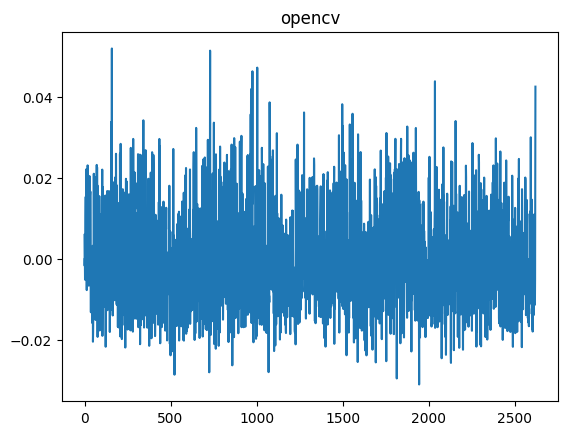

[0.013464144431054592, -0.004444625694304705, 0.00017567118629813194, -0.0037723586428910494, 0.0007279426790773869, 0.009221216663718224, 0.011961029842495918, 0.012854550033807755, 0.0017663883045315742, -0.00465479027479887, 0.02256355807185173, 0.014661180786788464, 0.018188048154115677, -0.005405795760452747, 0.010064858011901379, -0.0003748214803636074, 0.010008291341364384, 0.013385403901338577, 0.016867469996213913, 0.021677715703845024, 0.019190490245819092, -0.00012687843991443515, 0.00880367774516344, 0.007136782631278038, 0.005090381950139999, -0.005157778970897198, 0.0057654669508337975, -0.0026743467897176743, 0.008349473588168621, 0.015525536611676216, 0.01150338351726532, 0.00848475657403469, -0.0013942135265097022, 0.010547490790486336, 0.027490323409438133, 0.01492590643465519, 0.0033308365382254124, -0.008798511698842049, 0.005907172802835703, -0.007007518317550421, -0.0016328589990735054, -0.005109237506985664, -0.00718124583363533, 0.000360865262337029, -0.01312353

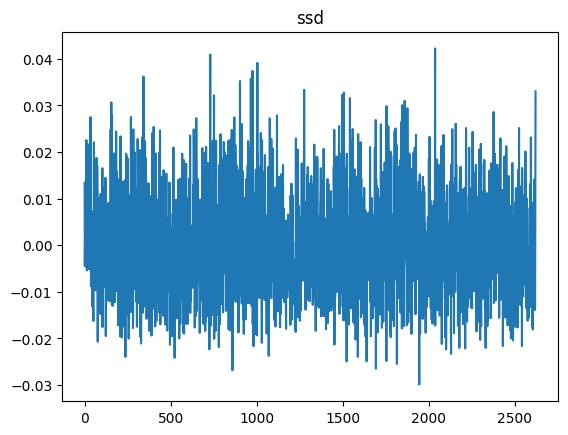

[0.008618505671620369, 0.003819387871772051, -0.006540984846651554, -0.0089378971606493, -0.004814682062715292, 0.004065873101353645, 0.012747012078762054, 0.0052037313580513, -0.002862379653379321, -0.004983422812074423, 0.020178884267807007, 0.01337854191660881, 0.014690999872982502, -0.007003494538366795, 0.011134019121527672, -0.008702520281076431, 0.0020974399521946907, 0.004365122877061367, 0.018054448068141937, 0.01861553080379963, 0.016107510775327682, 0.002789489459246397, 0.005482138134539127, 0.008217180147767067, 0.002173579065129161, -0.0011394182220101357, 0.005027179606258869, -0.0016668738098815084, 0.011272024363279343, 0.010544947348535061, 0.012500693090260029, 0.009030968882143497, 0.001067959237843752, 0.01044504251331091, 0.01349408645182848, 0.005910065025091171, 0.008687078952789307, -0.0068369098007678986, -0.006246590055525303, -0.0037711760960519314, -0.003184515517205, -0.0013263255823403597, -0.00850050151348114, -0.0013881707563996315, -0.01388713344931602

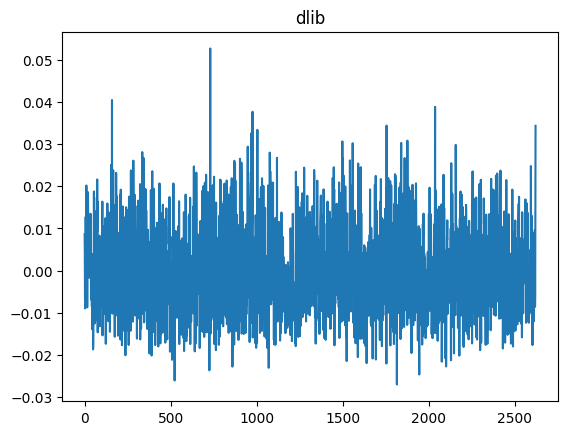

1/1 [==============================] - 0s 97ms/step
[0.010070912539958954, 0.006474318448454142, -0.0007787831127643585, -0.0007834911812096834, -0.0006277742795646191, 0.01150406152009964, 0.01715729385614395, 0.022823425009846687, 0.004885971546173096, -0.006917985156178474, 0.023620348423719406, 0.021945863962173462, 0.020820463076233864, -0.009899343363940716, 0.009290092624723911, 0.005130264908075333, 0.008213966153562069, 0.022971460595726967, 0.01717006228864193, 0.020456278696656227, 0.023107443004846573, 0.0017404956743121147, 0.00921099353581667, 0.013522395864129066, 0.007069090846925974, 0.00029140152037143707, 0.006762489210814238, -0.0007977942004799843, 0.005944934207946062, 0.016509996727108955, 0.014210954308509827, 0.007719953544437885, -0.003937778063118458, 0.01916428655385971, 0.03127346932888031, 0.02108229696750641, -0.004481244366616011, -0.005751274526119232, 0.003444960108026862, -0.0015390036860480905, 0.00023312028497457504, -0.0009330015163868666, -0.00741

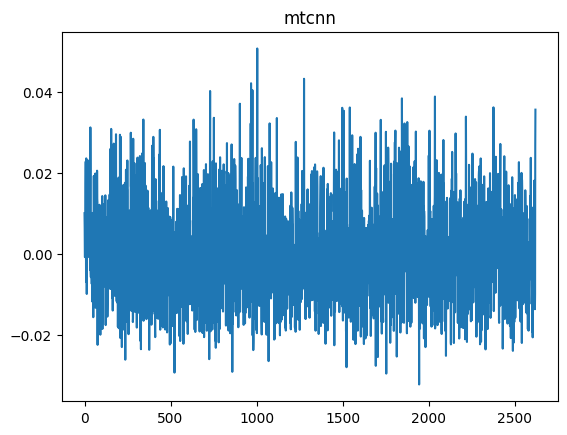

[0.013490371406078339, -0.003899191739037633, -0.0017358748009428382, -0.007808133959770203, 0.0009881549049168825, 0.01001592818647623, 0.009661782532930374, 0.006795894354581833, 0.002489008940756321, -0.003647555597126484, 0.01863238215446472, 0.00821608118712902, 0.01973900757730007, 0.0002379651414230466, 0.009673187509179115, -0.006790099665522575, 0.006761778146028519, 0.009686565026640892, 0.017966166138648987, 0.017906615510582924, 0.018795644864439964, 0.0016330796061083674, 0.007306248880922794, 0.004731347318738699, 0.000311213661916554, -0.0028794552199542522, -0.00013254978694021702, -0.0002737587783485651, 0.014921749010682106, 0.017958972603082657, 0.008484479039907455, 0.007605350576341152, 0.0009428400080651045, 0.011746056377887726, 0.020002488046884537, 0.019138433039188385, 0.009994253516197205, -0.005632845684885979, 0.0017022262327373028, -0.010223917663097382, -0.0003733437042683363, -0.005216284189373255, -0.0067954156547784805, 0.003490464063361287, -0.0144286

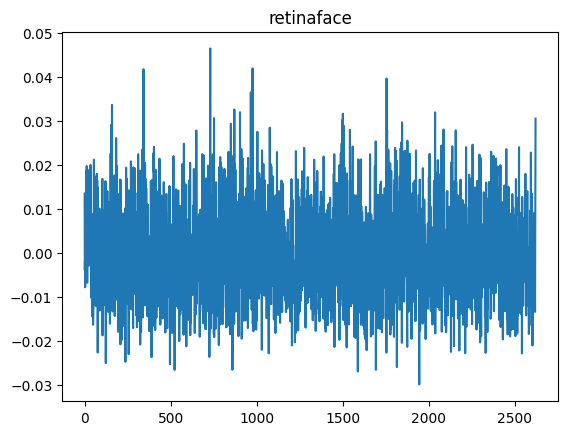

In [11]:
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface']

for backend in backends:
  obj = DeepFace.represent(img_path='./training_faces/Nidia_1.jpg', detector_backend=backend)
  obj = obj[0]
  obj_embedding = obj['embedding']
  print(obj_embedding)
  plt.plot(obj_embedding)
  plt.title(backend)
  plt.show()

## **7. Perform Face Detecting**

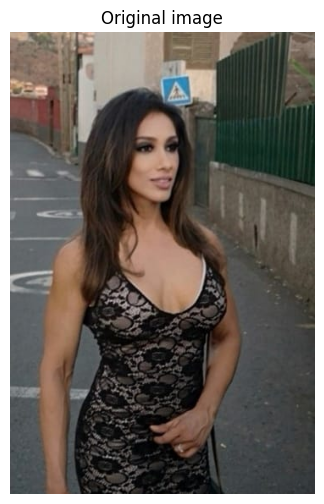

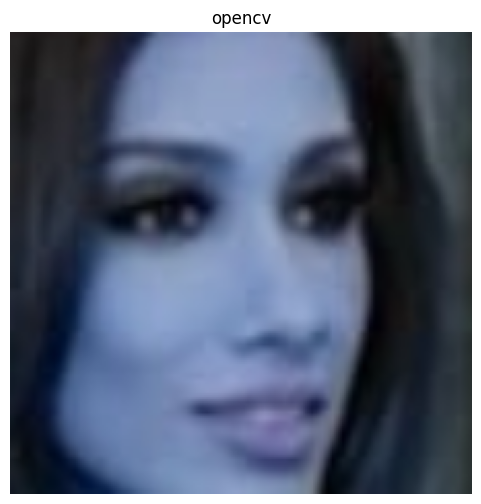

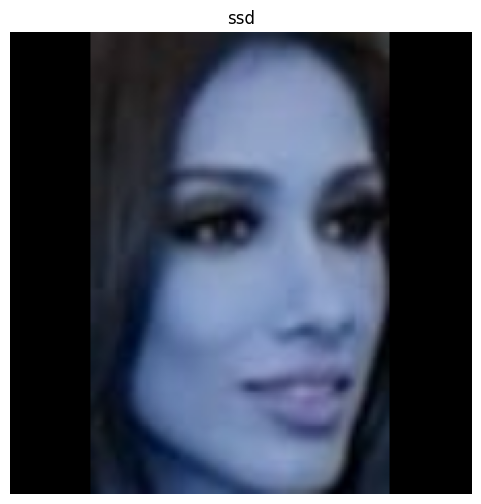

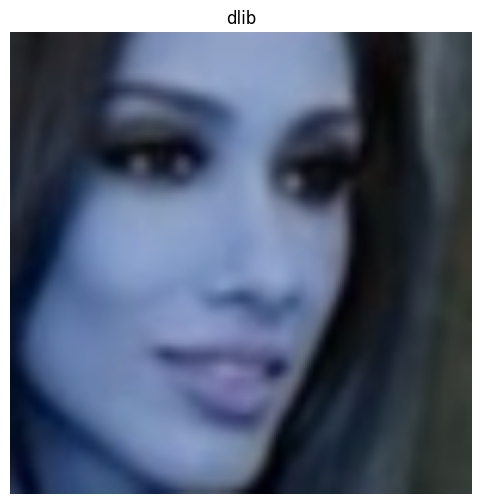

1/1 [==============================] - 0s 20ms/step


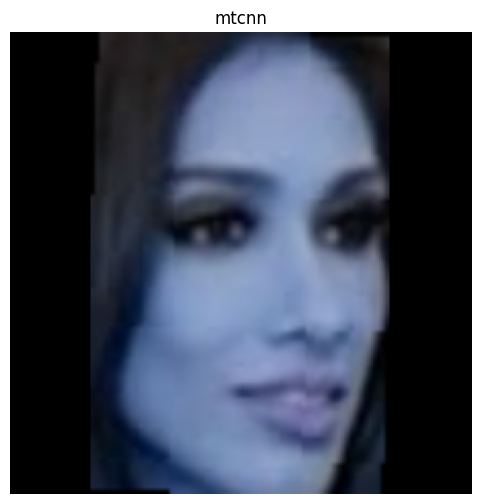

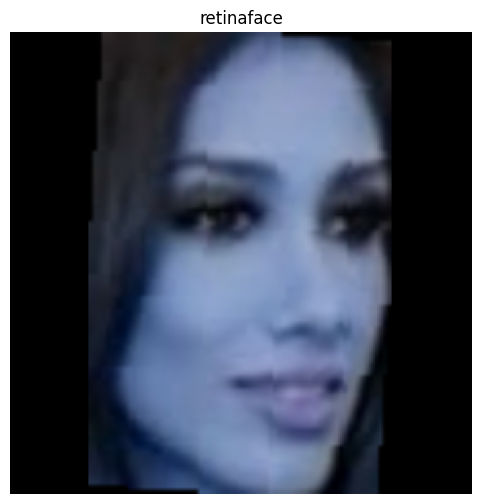

In [12]:
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface']
img = cv2.imread('./training_faces/Nidia_1.jpg')
imshow('Original image', img)
for backend in backends:
  obj = DeepFace.extract_faces(img_path='./training_faces/Nidia_1.jpg', target_size=(224, 224), detector_backend=backend)
  obj = obj[0]
  imshow(backend, obj['face'])